# Exploration of Ford GoBike System Data
## by Bunmi Akinola



## Introduction
> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [3]:
# import the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
#read file into pandas dataframe
df=pd.read_csv('fordgobike-tripdata.csv')

## Assessing Data

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [7]:
df.shape

(183412, 16)

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [11]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Quality Issues

- missing data
> start station id, start station name, end station id, end station name,member birth year, member gender

- start and end time data type is object

- member birth year data type is float

### Cleaning Data

#### Drop rows with missing data

In [13]:
# member birth year and member gender have the same row missing
empty_member= df[df['member_birth_year'].isnull()]

In [14]:
# drop missing rows
df.drop(empty_member.index, axis=0, inplace=True)

In [15]:
df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [16]:
# start station id, start station name, end station id and end station name have the same rows missing
empty_station=df[df['start_station_id'].isnull()]

In [17]:
# drop missing rows
df.drop(empty_station.index, axis=0, inplace=True)

In [18]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Changing data type

In [19]:
# change data type for start and end time
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [20]:
# change data type for member birth year, start station id, end station id, user type, member gender
df['member_birth_year']=df['member_birth_year'].astype(int)
df['start_station_id']=df['start_station_id'].astype(int)
df['end_station_id']=df['end_station_id'].astype(int)
df['user_type']= df['user_type'].astype('category')
df['member_gender']= df['member_gender'].astype('category')

In [21]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [22]:
# drop rows not needed
df.drop(columns=['start_station_latitude','start_station_longitude',
                 'end_station_latitude','end_station_longitude'], inplace=True)

In [23]:
# renaming bike share for all trip column
df.rename(columns={'bike_share_for_all_trip':'bike_share'}, inplace=True)

In [24]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender', 'bike_share'],
      dtype='object')

##### Create a column for age and group them

In [25]:
# create a column for age
df['age']= df['member_birth_year'].apply(lambda x: 2019 - x)

In [26]:
df.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

- Minimum age is 18 while the maximum age is 141

In [27]:
# define the range for the age group
bins = list(range(10, 110, 10))

# append the maximum age to bins
bins.append(df.age.max())

# define group labels
labels = [f"{str(group)}s" for group in bins[:-1]]

# print the bins and labels
bins, labels

([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 141],
 ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s'])

In [28]:
# categorizing the ages between 10 - 90
df["age_group"] = pd.cut(df.age, bins=bins, labels=labels)

# check the age group
df.age_group.value_counts()

20s     70054
30s     63808
40s     22024
50s     11323
10s      4213
60s      2955
70s       383
80s       115
100s       72
90s         5
Name: age_group, dtype: int64

In [29]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share,age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,30s
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,40s
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,20s
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,40s
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,50s


#### Extract the hour and day columns

In [30]:
#create column for start_day and start hour 
df['start_hour']= df['start_time'].dt.hour
df['start_day']= df['start_time'].dt.day_name()


#create columns for end_day and end_hour
df['end_hour']= df['end_time'].dt.hour
df['end_day']= df['end_time'].dt.day_name()

In [31]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender', 'bike_share', 'age',
       'age_group', 'start_hour', 'start_day', 'end_hour', 'end_day'],
      dtype='object')

In [32]:
# drop start time, end time and member birth year column
df.drop(columns=['start_time', 'end_time', 'member_birth_year'], inplace=True)

In [33]:
df.sample(6)

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share,age,age_group,start_hour,start_day,end_hour,end_day
36011,668,262,West St at University Ave,247,Fulton St at Bancroft Way,5123,Subscriber,Male,No,33,30s,17,Saturday,17,Saturday
161887,333,21,Montgomery St BART Station (Market St at 2nd St),28,The Embarcadero at Bryant St,410,Subscriber,Male,No,32,30s,13,Tuesday,13,Tuesday
89801,501,106,Sanchez St at 17th St,98,Valencia St at 16th St,5491,Subscriber,Male,No,21,20s,14,Saturday,14,Saturday
155597,423,357,2nd St at Julian St,310,San Fernando St at 4th St,1590,Subscriber,Male,Yes,26,20s,8,Wednesday,8,Wednesday
167694,2173,259,Addison St at Fourth St,231,14th St at Filbert St,4873,Subscriber,Female,No,30,20s,16,Monday,17,Monday
143012,741,102,Irwin St at 8th St,58,Market St at 10th St,425,Subscriber,Male,No,48,40s,16,Thursday,16,Thursday


In [34]:
df.to_csv('ford_gobike.csv', index=False)

### What is the structure of your dataset?

> There are 174952 rows in the dataset with 15 features; duration_sec, start station_id, start_station_name, end_station_id, end_station_name, bike id, user type, start day, member gender, bike share, age, age group, start hour, start day, end hour, end day.

### What are the main features of interest in your dataset?

> I'm most interested in figuring out when are most trips are taken in terms of hour and day of the week, does the user type influence the duration of the trip among many others

### What features in the dataset do you think will help support your investigation into your features of interest?

> I expect that day of the week have a strong influence on the duration trip. I also think that hour of the day will have a strong influence on the duration of the trip.

## Univariate Exploration

#### **Days of the week distribution**

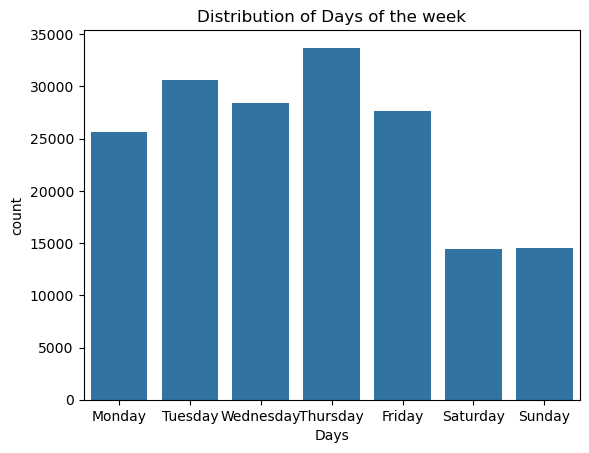

In [35]:
# counts of rides in each days of the week
colors=sns.color_palette()[0]
orders=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
az=sns.countplot(data=df, x='start_day', order=orders,color=colors)
az.set_xlabel('Days')
az.set_title('Distribution of Days of the week')
plt.show()

> Most rides were taken on thursday and tuesday

#### **Hours of the day distribution**

In [36]:
def countplots(df, col, colors, xlabel, title):
    c=sns.countplot(data=df, x=col, color=colors)
    c.set(xlabel=xlabel)
    c.set_title(title)

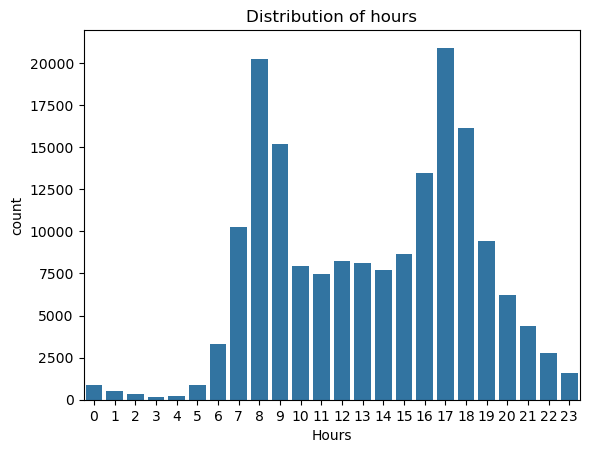

In [37]:
# plot showing the start hour distribution
colors=sns.color_palette()[0]
countplots(df, 'start_hour',colors, 'Hours', 'Distribution of hours')
plt.show()

> most rides started at 8th and 9th hour in the morning and 17th and 18th hour in the evening, which means those ride were taken when people leave for work nd when they close from work

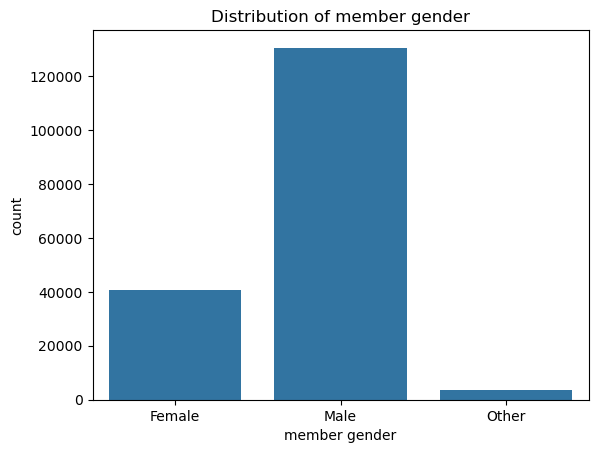

In [38]:
# plot showing member gender distribution
colors=sns.color_palette()[0]
countplots(df, 'member_gender',colors, 'member gender', 'Distribution of member gender')
plt.show()

> male members took more rides than other genders

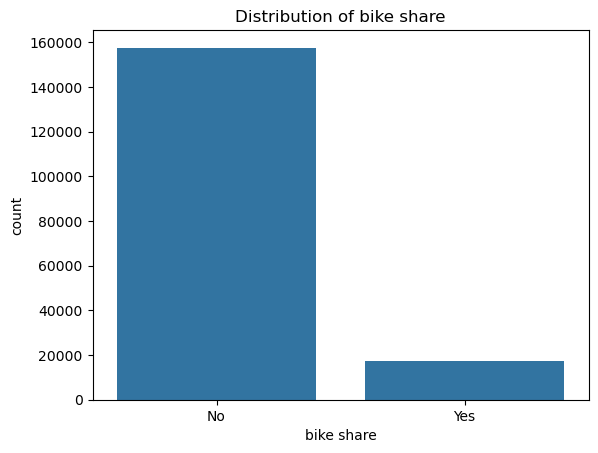

In [39]:
# plot showing bike share distribution
colors=sns.color_palette()[0]
countplots(df,'bike_share', colors, 'bike share', 'Distribution of bike share')
plt.show()

> Most rides were not shared

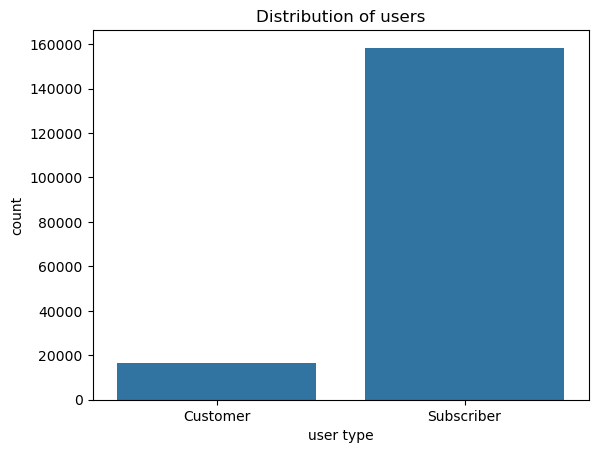

In [40]:
# plot showing user type distribution
colors=sns.color_palette()[0]
countplots(df, 'user_type', colors, 'user type', 'Distribution of users')
plt.show()

> there is a significant high amount of rides by the Subscribers

Text(0.5, 0, 'frequency')

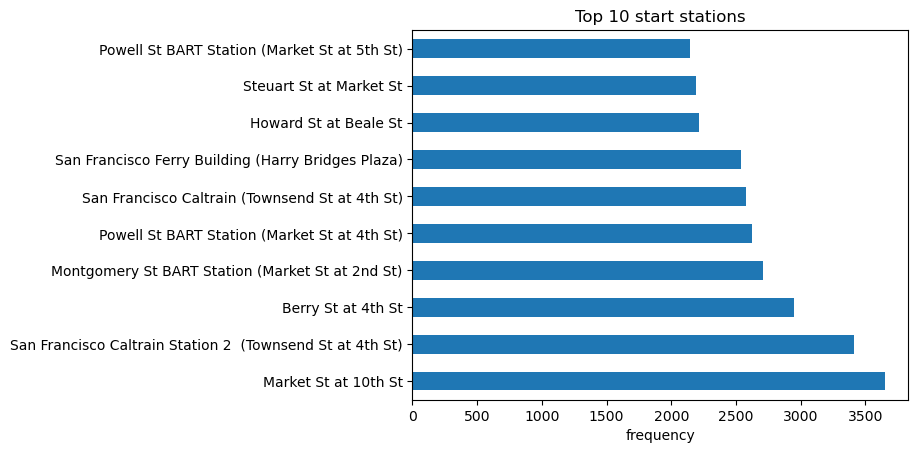

In [41]:
# top  10 stations with the highest rides
top_station= df.start_station_name.value_counts().nlargest(10)
top_station.plot(kind='barh', title='Top 10 start stations')
plt.xlabel('frequency')

> Plot showing top 10 stations where most rides occcured

### Summary

- Most rides were taken on Tuesday and Thursday
- The market station at 10th st is the busiest of all stations because over 3500 rides were taken there
- Subscribers took relatively higher amount of rides
- Most rides were not shared
- Out of all the members gender, the male took significantly high amount of rides
- Most rides were taken at the 8th and 9th hour in the morning when people leave for work and at the 17th and 18th hour in the evening when when they close from work

## Bivariate Exploration

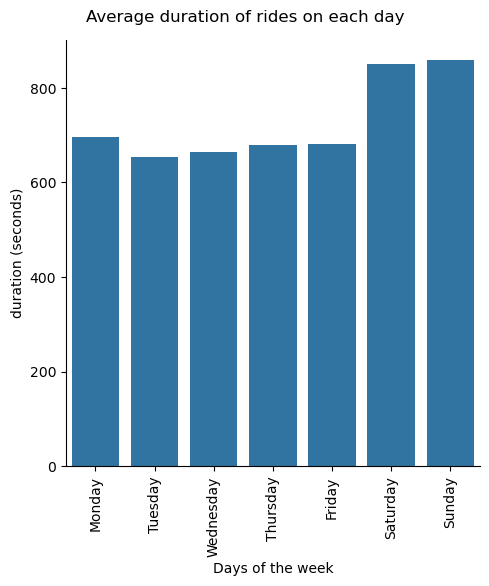

In [42]:
g=sns.catplot(x='start_day', y='duration_sec', data=df, kind='bar', order=orders,color=colors, ci=None)
g.set(xlabel='Days of the week',ylabel='duration (seconds)')
g.fig.suptitle('Average duration of rides on each day', y=1.03)
plt.xticks(rotation=90)
plt.show()

> This plot shows the average duration by seconds of rides on week days, from this we can see that rides on **saturday** and **sunday**  takes longer duration as compared to other weekdays

In [43]:
def plot_bar(col1,col2,df, colors, xlabel, ylabel, title):
    g=sns.catplot(x=col1,y=col2,data=df,kind='bar',color=colors,ci=None)
    g.set(xlabel=xlabel, ylabel=ylabel)
    g.fig.suptitle(title, y=1.03)

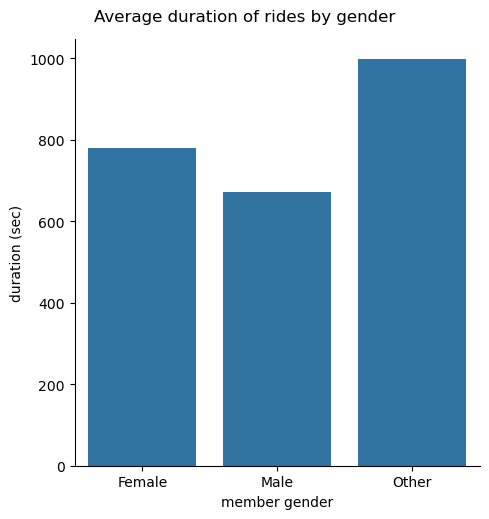

In [44]:
plot_bar('member_gender', 'duration_sec', df,colors, 'member gender', 'duration (sec)', 'Average duration of rides by gender')
plt.show()

> Rides by the **Other** gender takes longer duration as compared to **Male** and **Female**

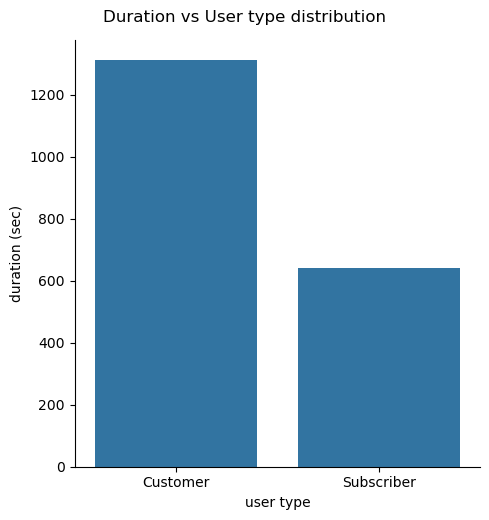

In [45]:
plot_bar('user_type', 'duration_sec',df,colors, 'user type', 'duration (sec)', 'Duration vs User type distribution')
plt.show()

> The is significantly high duration of rides by **customer** compared to **subscriber**

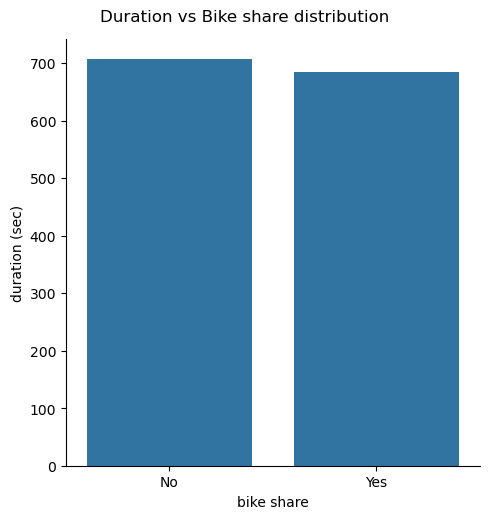

In [46]:
plot_bar('bike_share', 'duration_sec',df,colors, 'bike share', 'duration (sec)','Duration vs Bike share distribution')
plt.show()

> There is no significant difference in the duration of rides shared and ride not shared

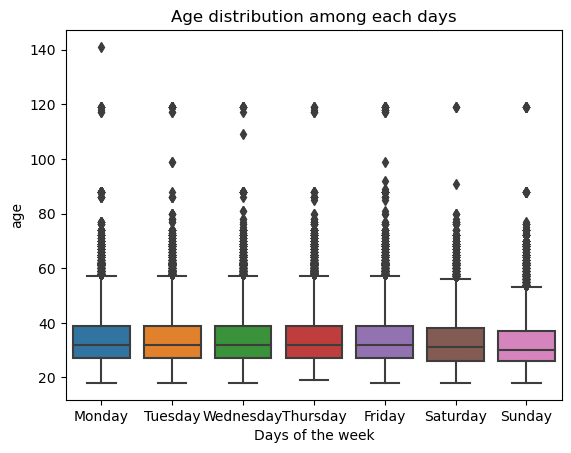

In [47]:
b=sns.boxplot(x='start_day', y='age', data=df, order=orders)
b.set_xlabel('Days of the week')
b.set_ylabel('age')
b.set_title('Age distribution among each days')
plt.show()

> There is no significant differnce in the spread or median age of riders across the days of the week

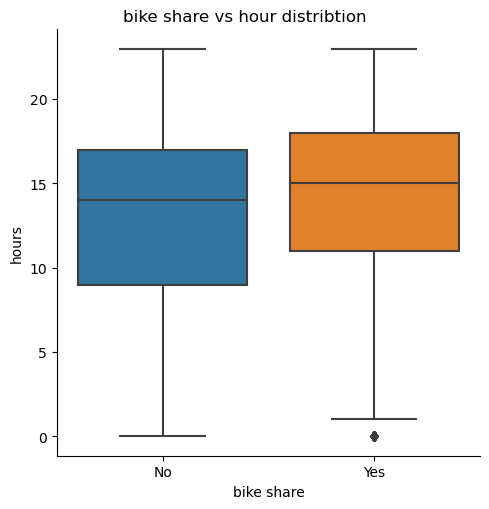

In [48]:
ax=sns.catplot(x='bike_share',y='start_hour', data=df, kind='box')
ax.set(xlabel='bike share', ylabel='hours')
ax.fig.suptitle('bike share vs hour distribtion', y=1.01)
plt.show()

> This plot shows that the median hour is higher for the shared trips and the spread of the distribution is also larger

### Summary

- Rides on saturday and sunday takes longer duration as compared to other weekdays
- Bike share does not influence the duration of rides
- The user type influences the duration of rides
- Rides on the work free days(saturday and sunday) takes longer duration

## Multivariate Exploration

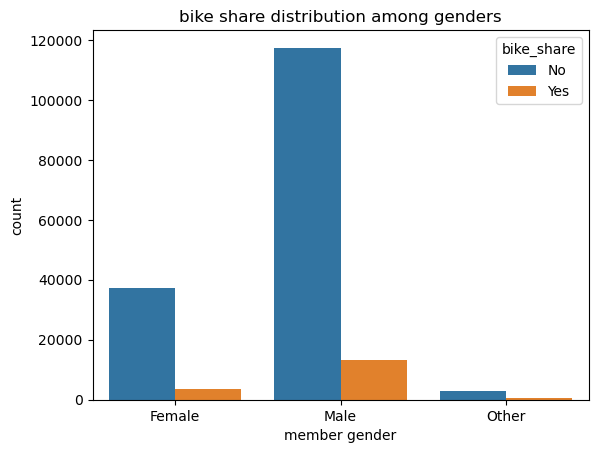

In [49]:
ac= sns.countplot(x='member_gender', data=df,hue='bike_share')
ac.set_xlabel('member gender')
ac.set_title('bike share distribution among genders')
plt.show()

- The male gender shared more ride compared to other genders

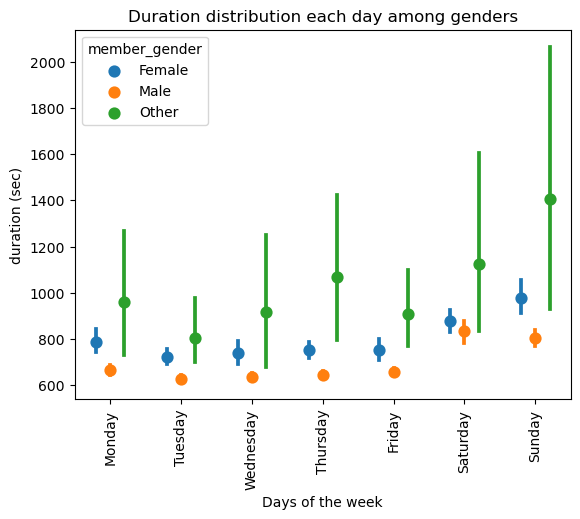

In [50]:
# lineplot showing duration of rides each day among the genders
f= sns.pointplot(x='start_day', y='duration_sec', data=df,hue='member_gender', order=orders, linestyles='', dodge=0.4)
f.set_xlabel('Days of the week')
f.set_ylabel('duration (sec)')
f.set_title('Duration distribution each day among genders')
plt.xticks(rotation=90)
plt.show()

> The duration of rides taken by **other gender** each day is significantly higher than the **male** and **female**

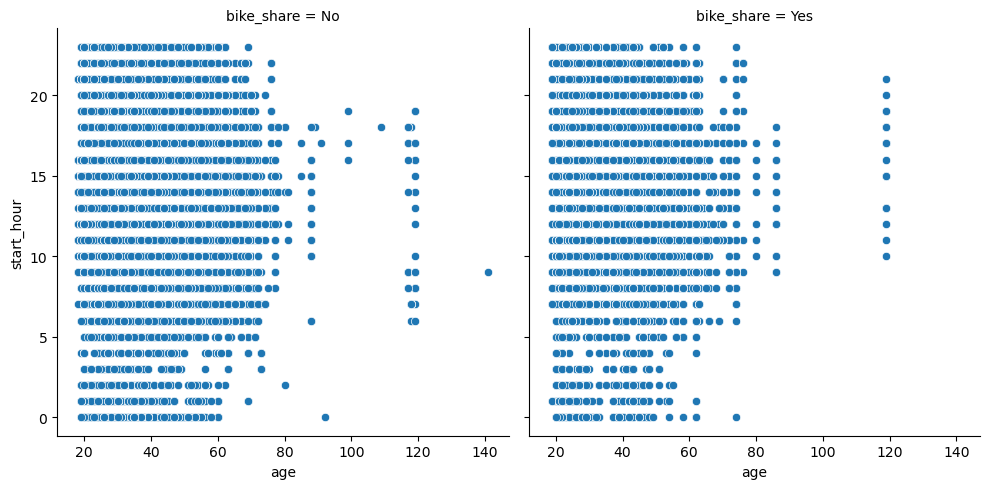

In [51]:
# create scatterplot showing relationship between age ahd hour grouped by bike share
sns.relplot(x='age', y='start_hour', data=df, kind='scatter', col='bike_share')
plt.show()

> Judging from the plot, we can see that age does not have a significant effect on the hours of ride among the user type

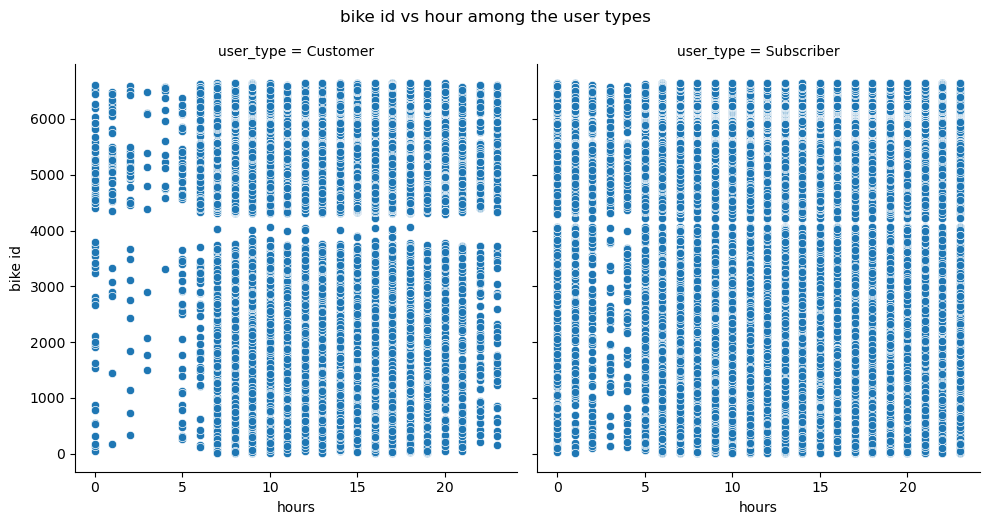

In [52]:
# create a plot showing relation between bike id and start hour among the user types
ar= sns.relplot(x='start_hour', y='bike_id', data=df, kind='scatter', col='user_type')
ar.set(xlabel='hours',ylabel='bike id')
ar.fig.suptitle('bike id vs hour among the user types', y=1.04)
plt.show()

> the relationship between bike id and hours among the user type is ambiguous

### Summary

- Among the genders, the male gender shared the most ride
- Also other gender took most rides
- The duration of rides taken by other gender each day is significantly higher than the male and female
- Age has no significant effect on hours of ride among user types